In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib
from wordcloud import WordCloud

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings("ignore") 

In [6]:
df= pd.read_csv('소득에 따른 외식.csv')
df

,한달 소득,외식,배달음식,직접요리,코로나 종식_외식,코로나 종식_배달,코로나 종식_직접요리
0,100만원 ~ 199만원,많이 증가,많이 증가,조금 증가,복귀,유지,복귀
1,600만원 ~ 699만원,조금 증가,많이 증가,변화없음,복귀,복귀,NaN
2,100만원 ~ 199만원,많이 감소,많이 증가,많이 증가,유지,유지,유지
3,"1,000만원 이상",조금 증가,많이 증가,조금 증가,유지,유지,복귀
4,800만원 ~ 899만원,변화없음,조금 증가,조금 증가,NaN,유지,유지
...,...,...,...,...,...,...,...
995,"1,000만원 이상",조금 감소,조금 증가,조금 증가,복귀,유지,유지
996,500만원 ~ 599만원,많이 증가,많이 증가,조금 증가,복귀,유지,유지
997,300만원 ~ 399만원,조금 증가,조금 감소,많이 감소,유지,유지,유지
998,200만원 ~ 299만원,조금 증가,조금 증가,변화없음,유지,유지,NaN


In [7]:
df.isnull().sum()

한달 소득            0
외식               0
배달음식             0
직접요리             0
코로나 종식_외식      262
코로나 종식_배달      298
코로나 종식_직접요리    341
dtype: int64

In [9]:
df["한달 소득"].value_counts()

400만원 ~ 499만원    170
300만원 ~ 399만원    165
500만원 ~ 599만원    130
200만원 ~ 299만원    128
600만원 ~ 699만원     99
100만원 ~ 199만원     75
1,000만원 이상        69
700만원 ~ 799만원     54
800만원 ~ 899만원     41
100만원 미만          34
900만원 ~ 999만원     31
소득 없음              4
Name: 한달 소득, dtype: int64

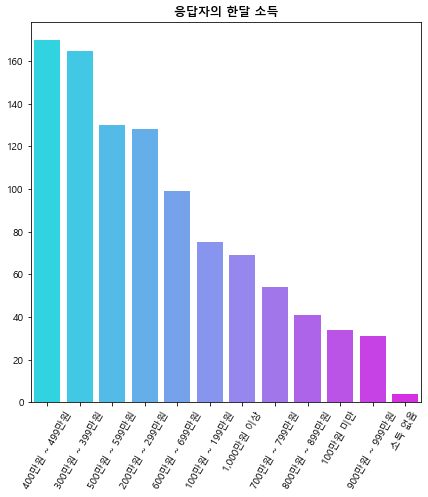

In [11]:
plt.figure(figsize=(7,7)) 
sns.barplot(x = df["한달 소득"].value_counts().index,
            y = df["한달 소득"].value_counts().values,palette="cool") 
plt.xticks(rotation=60) 
plt.title("응답자의 한달 소득",fontweight="bold") 
plt.rcParams["font.family"]="Malgun Gothic"
plt.show()

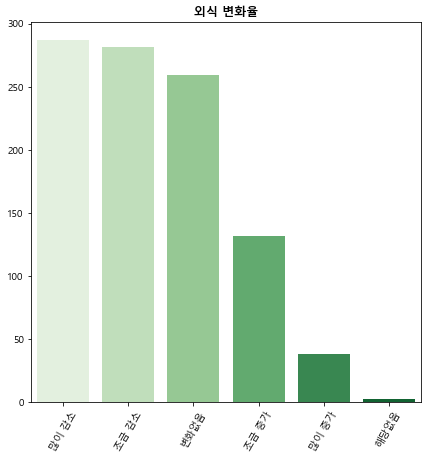

In [19]:
plt.figure(figsize=(7,7)) 
sns.barplot(x = df["외식"].value_counts().index,
            y = df["외식"].value_counts().values,palette="Greens") 
plt.xticks(rotation=60) 
plt.title("외식 변화율",fontweight="bold") 
plt.rcParams["font.family"]="Malgun Gothic"
plt.show()

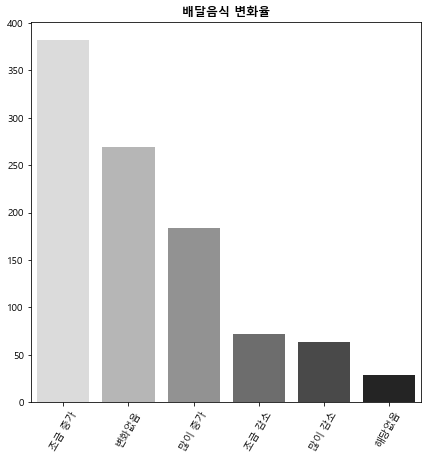

In [17]:
plt.figure(figsize=(7,7)) 
sns.barplot(x = df["배달음식"].value_counts().index,
            y = df["배달음식"].value_counts().values,palette="binary") 
plt.xticks(rotation=60) 
plt.title("배달음식 변화율",fontweight="bold") 
plt.rcParams["font.family"]="Malgun Gothic"
plt.show()

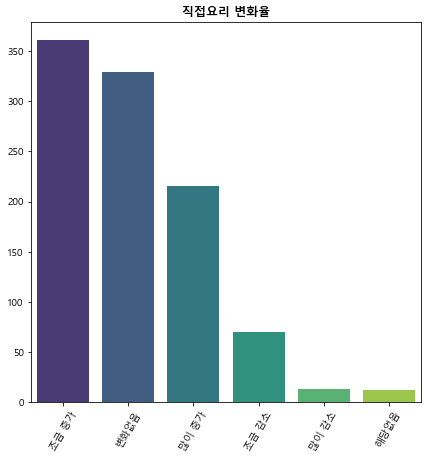

In [21]:
plt.figure(figsize=(7,7)) 
sns.barplot(x = df["직접요리"].value_counts().index,
            y = df["직접요리"].value_counts().values,palette="viridis") 
plt.xticks(rotation=60) 
plt.title("직접요리 변화율",fontweight="bold") 
plt.rcParams["font.family"]="Malgun Gothic"
plt.show()

In [22]:
a=df.groupby(['한달 소득','외식']).size()
a

한달 소득          외식   
1,000만원 이상     많이 감소    23
               많이 증가     1
               변화없음     19
               조금 감소    14
               조금 증가    11
               해당없음      1
100만원 ~ 199만원  많이 감소    28
               많이 증가     3
               변화없음     22
               조금 감소    15
               조금 증가     7
100만원 미만       많이 감소     8
               많이 증가     1
               변화없음     10
               조금 감소    11
               조금 증가     2
               해당없음      2
200만원 ~ 299만원  많이 감소    39
               많이 증가     5
               변화없음     30
               조금 감소    35
               조금 증가    19
300만원 ~ 399만원  많이 감소    45
               많이 증가     9
               변화없음     46
               조금 감소    51
               조금 증가    14
400만원 ~ 499만원  많이 감소    41
               많이 증가     8
               변화없음     43
               조금 감소    51
               조금 증가    27
500만원 ~ 599만원  많이 감소    31
               많이 증가     8
               변화없음     32
               조금 감소    40
       

In [23]:
bo=pd.DataFrame(a)
bo.to_csv('소득외식')
bob1=pd.read_csv('소득외식')
bob1

,한달 소득,외식,0
0,"1,000만원 이상",많이 감소,23
1,"1,000만원 이상",많이 증가,1
2,"1,000만원 이상",변화없음,19
3,"1,000만원 이상",조금 감소,14
4,"1,000만원 이상",조금 증가,11
5,"1,000만원 이상",해당없음,1
6,100만원 ~ 199만원,많이 감소,28
7,100만원 ~ 199만원,많이 증가,3
8,100만원 ~ 199만원,변화없음,22
9,100만원 ~ 199만원,조금 감소,15


Text(0.5, 1.0, '소득에 따른 외식의 변화')

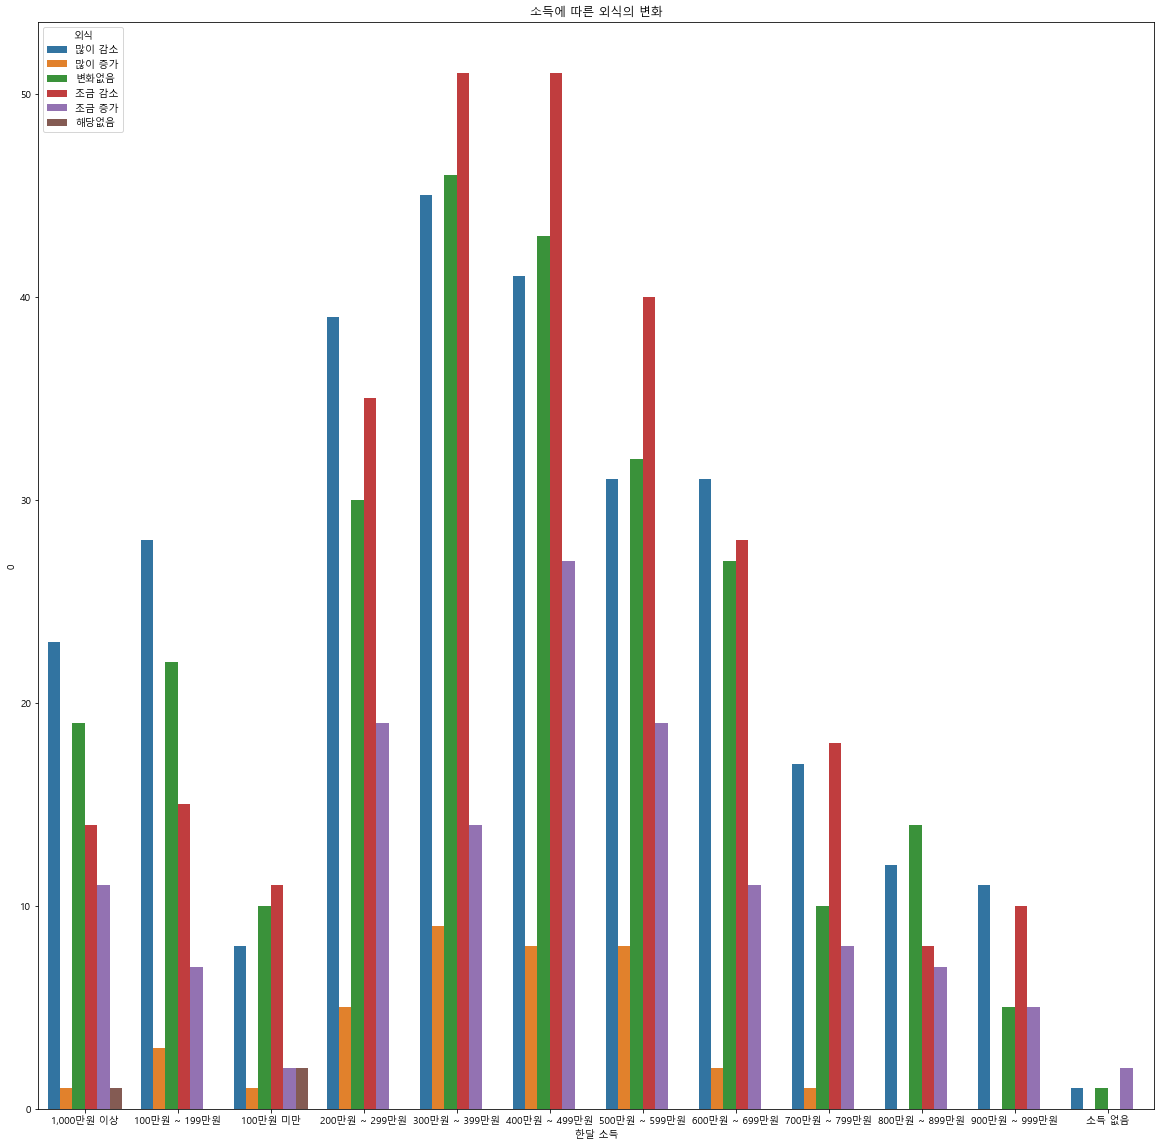

In [27]:
plt.figure(figsize=(20,20)) 
sns.barplot(x='한달 소득', y='0',hue='외식',data=bob1)
plt.title("소득에 따른 외식의 변화")

In [28]:
b=df.groupby(['한달 소득','배달음식']).size()
b

한달 소득          배달음식 
1,000만원 이상     많이 감소     5
               많이 증가    15
               변화없음     19
               조금 감소     2
               조금 증가    25
                        ..
900만원 ~ 999만원  조금 감소     2
               조금 증가    12
소득 없음          많이 감소     1
               변화없음      1
               조금 증가     2
Length: 66, dtype: int64

In [29]:
bo1=pd.DataFrame(b)
bo1.to_csv('소득배달')
bob2=pd.read_csv('소득배달')
bob2

,한달 소득,배달음식,0
0,"1,000만원 이상",많이 감소,5
1,"1,000만원 이상",많이 증가,15
2,"1,000만원 이상",변화없음,19
3,"1,000만원 이상",조금 감소,2
4,"1,000만원 이상",조금 증가,25
...,...,...,...
61,900만원 ~ 999만원,조금 감소,2
62,900만원 ~ 999만원,조금 증가,12
63,소득 없음,많이 감소,1
64,소득 없음,변화없음,1


Text(0.5, 1.0, '소득에 따른 배달 음식 주문의 변화')

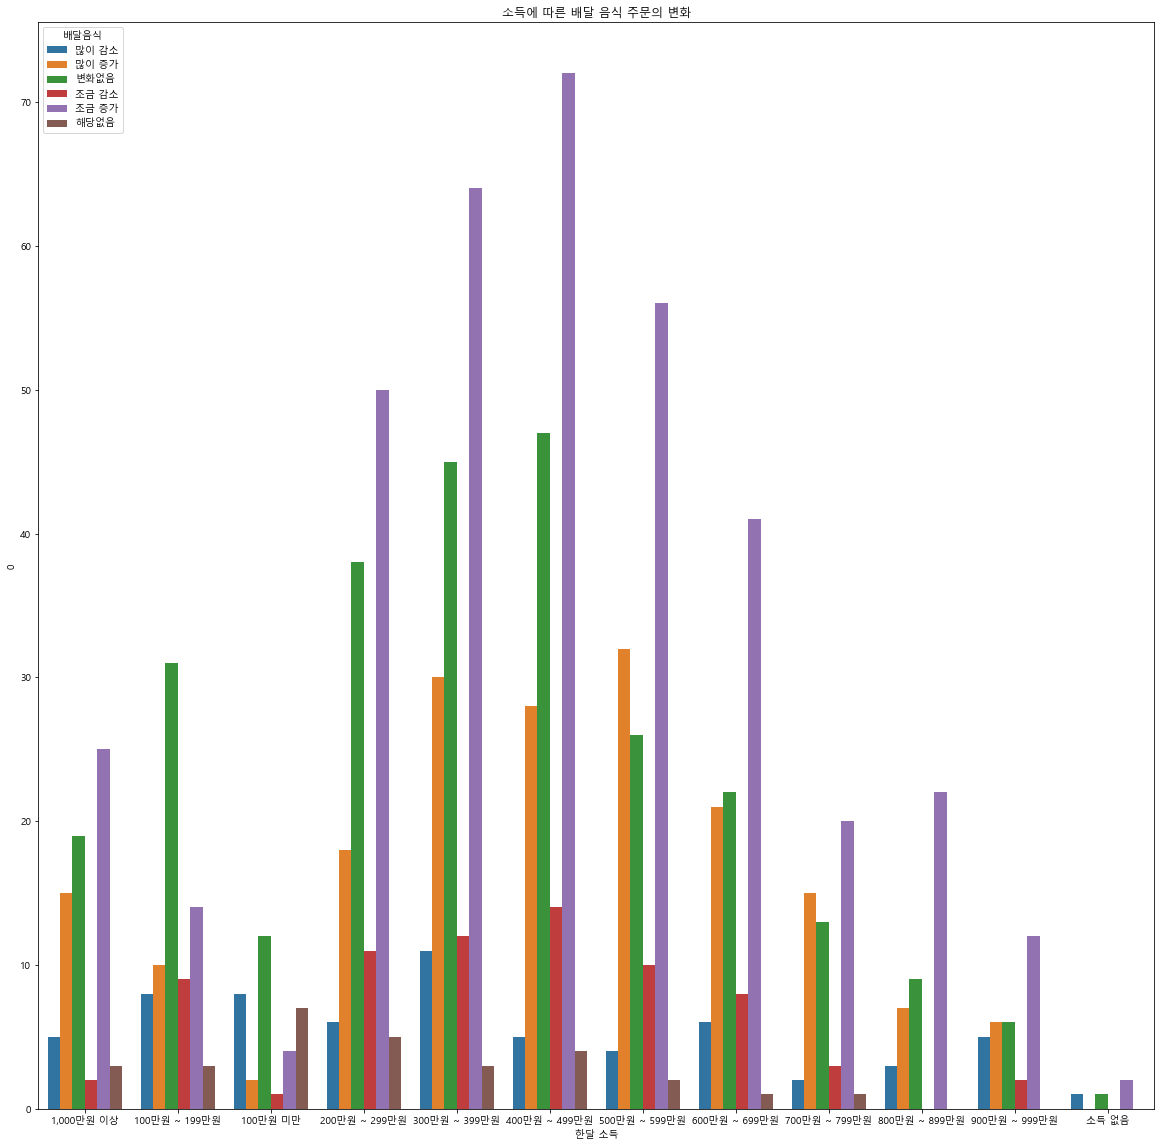

In [31]:
plt.figure(figsize=(20,20)) 
sns.barplot(x='한달 소득', y='0',hue='배달음식',data=bob2)
plt.title("소득에 따른 배달 음식 주문의 변화")

In [32]:
c=df.groupby(['한달 소득','직접요리']).size()
c

한달 소득          직접요리 
1,000만원 이상     많이 감소     1
               많이 증가    10
               변화없음     28
               조금 감소     4
               조금 증가    25
               해당없음      1
100만원 ~ 199만원  많이 증가    15
               변화없음     24
               조금 감소     8
               조금 증가    25
               해당없음      3
100만원 미만       많이 감소     1
               많이 증가     5
               변화없음     17
               조금 증가    11
200만원 ~ 299만원  많이 감소     2
               많이 증가    31
               변화없음     39
               조금 감소    10
               조금 증가    44
               해당없음      2
300만원 ~ 399만원  많이 감소     3
               많이 증가    32
               변화없음     54
               조금 감소    13
               조금 증가    62
               해당없음      1
400만원 ~ 499만원  많이 감소     4
               많이 증가    34
               변화없음     53
               조금 감소    12
               조금 증가    65
               해당없음      2
500만원 ~ 599만원  많이 감소     1
               많이 증가    30
               변화없음     45
       

In [34]:
bo2=pd.DataFrame(c)
bo2.to_csv('소득요리')
bob3=pd.read_csv('소득요리')
bob3

,한달 소득,직접요리,0
0,"1,000만원 이상",많이 감소,1
1,"1,000만원 이상",많이 증가,10
2,"1,000만원 이상",변화없음,28
3,"1,000만원 이상",조금 감소,4
4,"1,000만원 이상",조금 증가,25
5,"1,000만원 이상",해당없음,1
6,100만원 ~ 199만원,많이 증가,15
7,100만원 ~ 199만원,변화없음,24
8,100만원 ~ 199만원,조금 감소,8
9,100만원 ~ 199만원,조금 증가,25


Text(0.5, 1.0, '소득에 따른 직접요리의 변화')

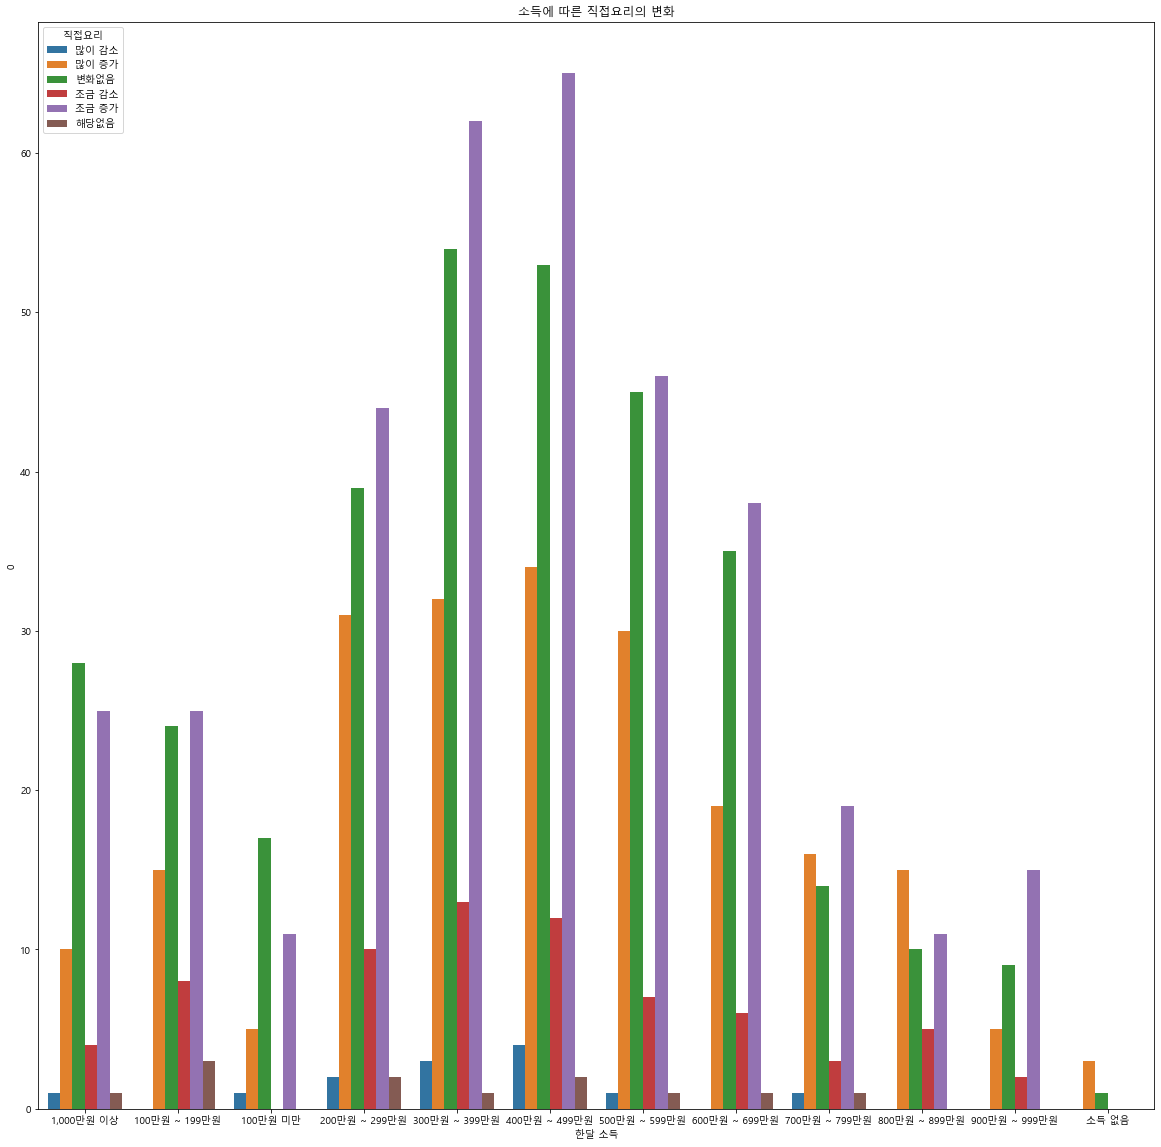

In [35]:
plt.figure(figsize=(20,20)) 
sns.barplot(x='한달 소득', y='0',hue='직접요리',data=bob3)
plt.title("소득에 따른 직접요리의 변화")